In [1]:
from PIL import Image
import pytesseract
import cv2 
import matplotlib.pyplot as plot
import numpy as np

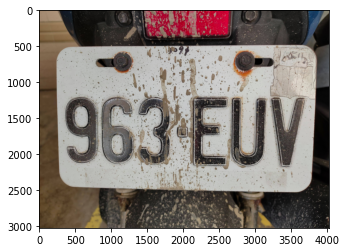

In [2]:
# 讀取圖片 默認為BGR
img = cv2.imread("./pic/license.jpg")
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plot.imshow(img)
plot.show()

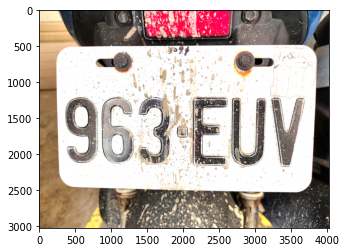

In [3]:
# 調整對比度，alpha為對比、beta為亮度
alpha = 1.7
beta = 0
adjusted = cv2.convertScaleAbs(img, alpha=alpha, beta=beta)
plot.imshow(adjusted)
plot.show()

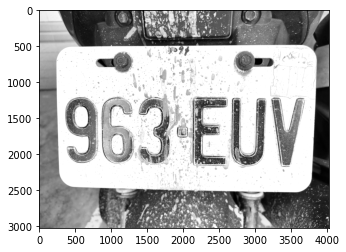

In [4]:
# 轉為黑白(0~255) 255最白 0 最黑
img2 = cv2.cvtColor(adjusted,cv2.COLOR_RGB2GRAY)
plot.imshow(img2,cmap="gray")
plot.show()

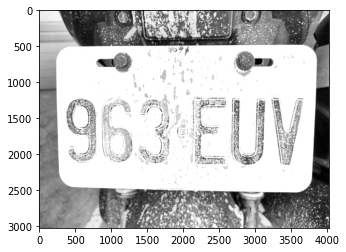

In [5]:
# 膨脹與腐蝕 去除黑白點
kernel = np.ones((5, 5), np.uint8)
binary = cv2.dilate(img2, kernel, iterations=2) #膨脹
binary = cv2.erode(binary, kernel, iterations=1) #侵蝕
plot.imshow(binary,cmap="gray")
plot.show()
# iterations代表卷機掃描次數

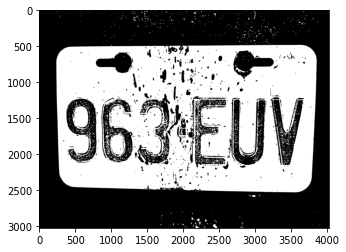

In [6]:
# 圖片二值化
ret, binary = cv2.threshold(binary,250, 255, cv2.THRESH_BINARY)
plot.imshow(binary,cmap="gray")
plot.show()


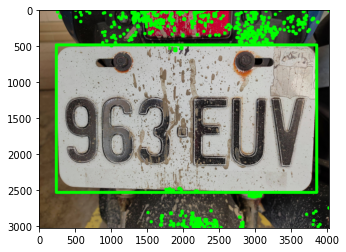

In [7]:
# 圈出邊界，並檢視
contour,hierarchy = cv2.findContours(binary,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
copy_img = img.copy()
for cnt in contour:
    x,y,w,h = cv2.boundingRect(cnt)
    cv2.rectangle(copy_img,(x,y),(x+w,y+h),(0,255,0),40)
plot.imshow(copy_img)
plot.show()

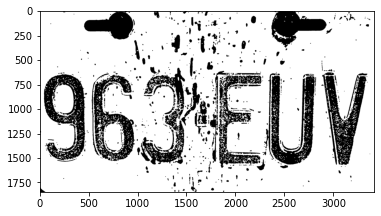

In [8]:
# 找出最大邊界，並切割
cnt = max(contour,key=len)
x,y,w,h = cv2.boundingRect(cnt)
crop_img = binary[y+100:y+h-100,x+100:x+w-100]
plot.imshow(crop_img,cmap="gray")
plot.show()

1846 3420


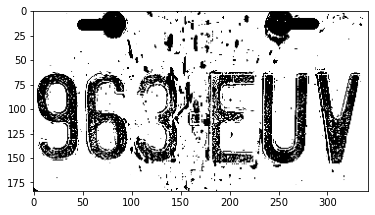

In [9]:
# 改變圖片大小
crop_x,crop_y = crop_img.shape
print(crop_x,crop_y)
new_img = cv2.resize(crop_img,(int(crop_y/10),int(crop_x/10)))
plot.imshow(new_img,cmap='gray')
plot.show()

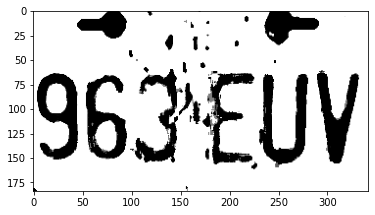

In [10]:
# 模糊化 (去除噪點)
blur = cv2.medianBlur(new_img,5)
plot.imshow(blur,cmap='gray')
plot.show()

In [11]:
# 辨識
text = pytesseract.image_to_string(blur,lang="eng")
print(text)

967 EUV
